<a href="https://colab.research.google.com/github/Rafiqahh/APM_KLP10/blob/main/KNN_Kelompok10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df = df.replace('?',np.NaN)
df = df.dropna(axis = 0)
df = df.reset_index(drop=True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
df['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [6]:
df['income'] = (df['income']==("<=50K")).astype(int)

df['income'].head()

0    1
1    1
2    0
3    0
4    1
Name: income, dtype: int64

In [7]:
df_str = df.select_dtypes(include='object')
df_int = df.select_dtypes(exclude='object')
df_str.describe(include='all')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,33307,14783,21055,6020,18666,38903,30527,41292


In [8]:
df_str.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States


In [9]:
df_int.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,40,1
1,38,89814,9,0,0,50,1
2,28,336951,12,0,0,40,0
3,44,160323,10,7688,0,40,0
4,34,198693,6,0,0,30,1


In [10]:
df_str = pd.get_dummies(df_str)
df_str.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
y_last = df_int['income']
x = df_int.drop(columns='income')
column_names = x.columns.values

In [13]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x_stndrd = scaler.fit_transform(x)
type(x_stndrd)

numpy.ndarray

In [14]:
x_stndrd = pd.DataFrame(x_stndrd)
x_stndrd.columns = column_names
x_stndrd.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.024983,0.350889,-1.221559,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.945878,-0.438122,-0.146733,-0.21878,0.754701
2,-0.798015,1.393592,0.737034,-0.146733,-0.21878,-0.078120
3,0.412481,-0.278420,-0.046403,0.877467,-0.21878,-0.078120
4,-0.344079,0.084802,-1.613277,-0.146733,-0.21878,-0.910942


In [17]:
x_last = pd.concat([x_stndrd,df_str],axis=1)
x_last.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-1.024983,0.350889,-1.221559,-0.146733,-0.21878,-0.078120,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.041455,-0.945878,-0.438122,-0.146733,-0.21878,0.754701,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.798015,1.393592,0.737034,-0.146733,-0.21878,-0.078120,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.412481,-0.278420,-0.046403,0.877467,-0.21878,-0.078120,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.344079,0.084802,-1.613277,-0.146733,-0.21878,-0.910942,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test  = train_test_split(x_last,y_last,test_size=0.30,random_state=42)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4).fit(x_train,y_train)

In [22]:
y_hat = neigh.predict(x_test)
y_hat

array([1, 1, 0, ..., 1, 1, 1])

In [24]:
y_test

20084    1
20027    1
39505    0
39534    1
12586    1
        ..
34451    0
21928    1
18106    1
31496    1
37077    1
Name: income, Length: 13567, dtype: int64

In [26]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_hat)

0.8132232623277069

In [27]:
Ks=30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    y_hat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,y_hat)
    std_acc[n-1] = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])
    
mean_acc

array([0.79774453, 0.77762217, 0.82199455, 0.81322326, 0.83150291,
       0.82700671, 0.83843149, 0.83481978, 0.83880003, 0.83739957,
       0.84071644, 0.84167465, 0.84366477, 0.84270657, 0.84373848,
       0.84292769, 0.84329623, 0.84381219, 0.84381219, 0.84395961,
       0.84418073, 0.84336994, 0.84454927, 0.8438859 , 0.84425444,
       0.84432815, 0.84454927, 0.84373848, 0.84418073])

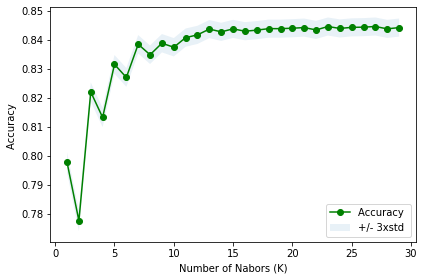

In [31]:
plt.plot(range(1,Ks),mean_acc,'g',marker='o')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [32]:
neigh = KNeighborsClassifier(n_neighbors=13).fit(x_train,y_train)
y_hat = neigh.predict(x_test)
metrics.accuracy_score(y_test,y_hat)

0.8436647748212575

In [34]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
confusion_matrix(y_test, y_hat)

array([[2056, 1270],
       [ 851, 9390]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


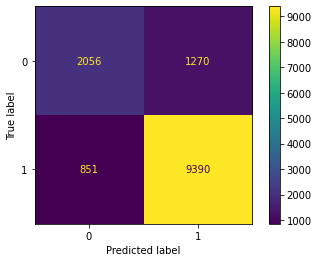

In [35]:
plot_confusion_matrix(neigh,x_test,y_test)